<a href="https://colab.research.google.com/github/Atharva-D/Moodify/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading Dataset**

#**Unzipping the dataset**

In [1]:

#!unzip face-expression-recognition-dataset

#**Importing necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications import MobileNetV2
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy
import scipy

#**Training Data**

In [3]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "train", 
                                             target_size=(224,224), 
                                             #target_size=(48,48),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

#**Testing Data**

In [4]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "test", 
                                        target_size=(224,224), 
                                        #target_size=(48,48),
                                           batch_size=32)
val_data.class_indices

Found 7178 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# **Visualize the images in the training data**

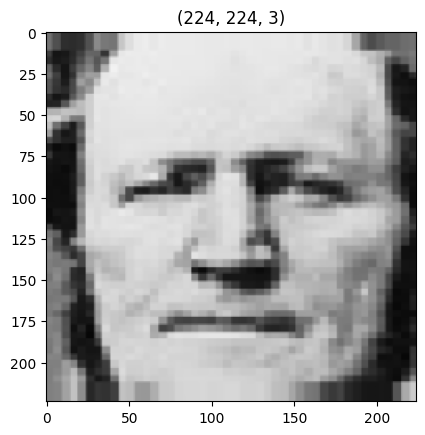

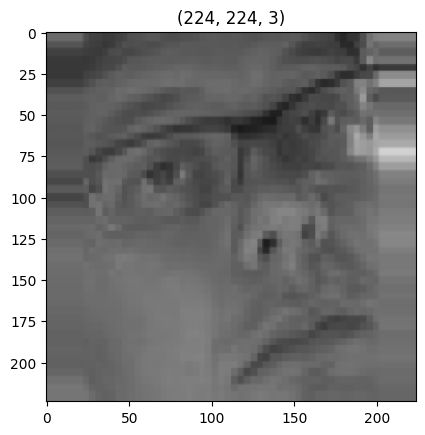

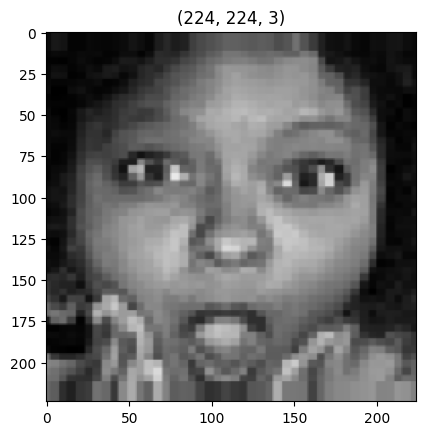

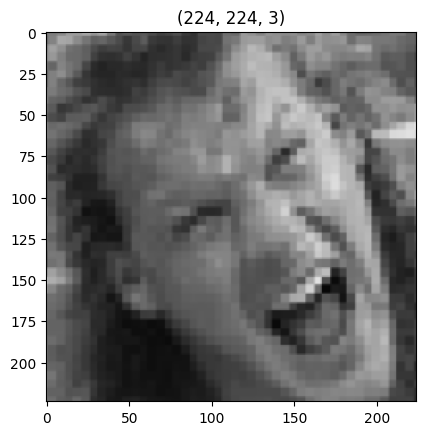

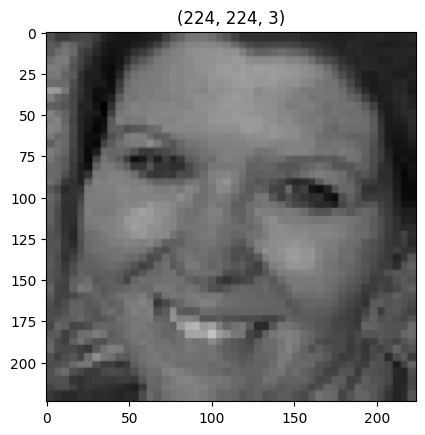

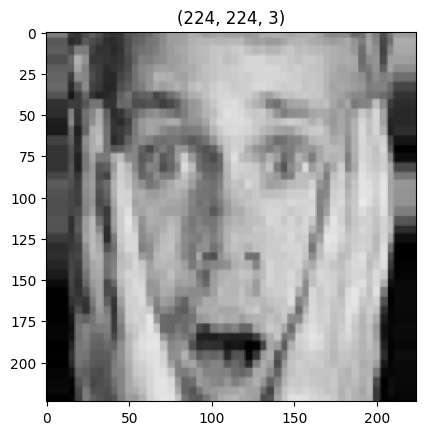

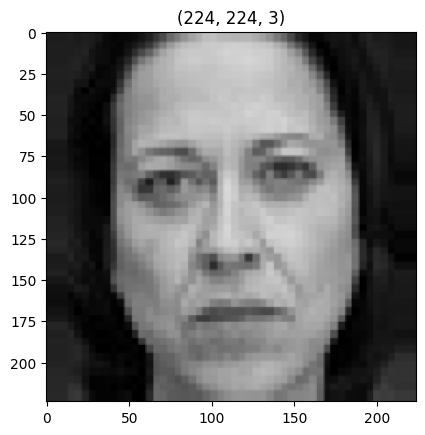

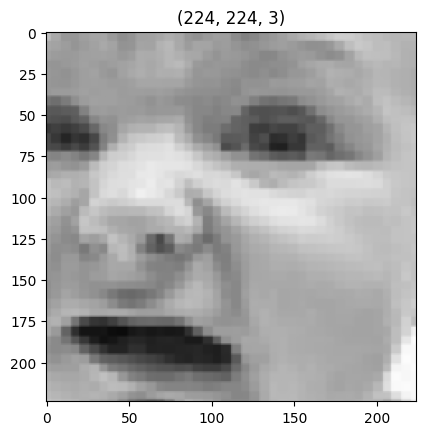

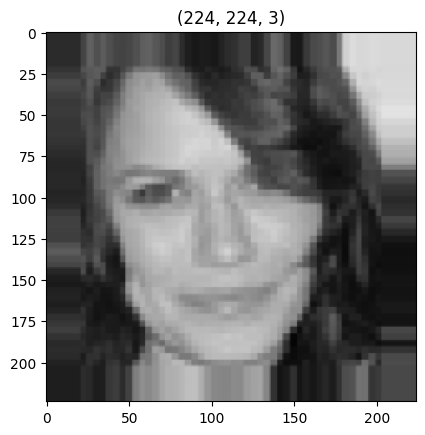

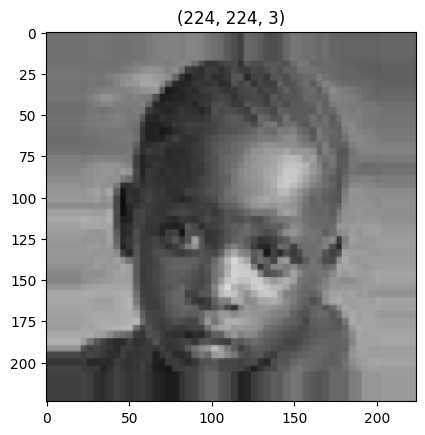

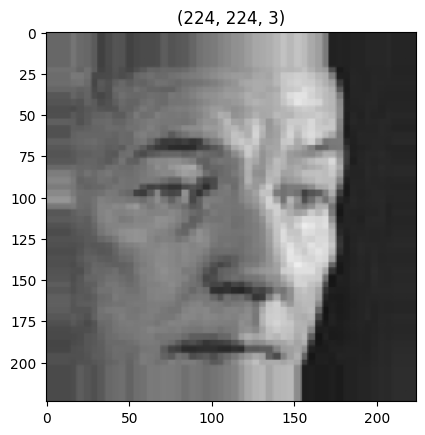

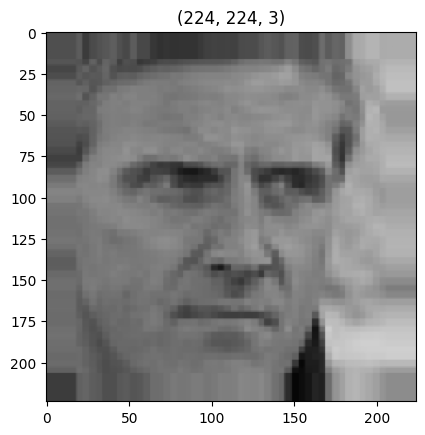

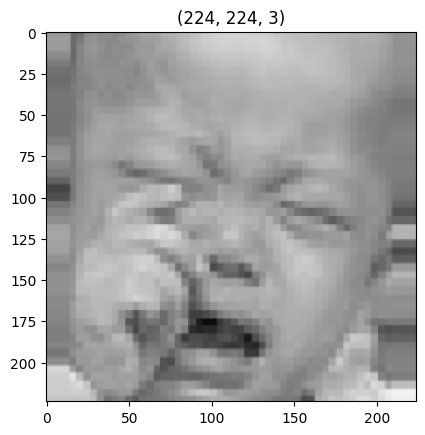

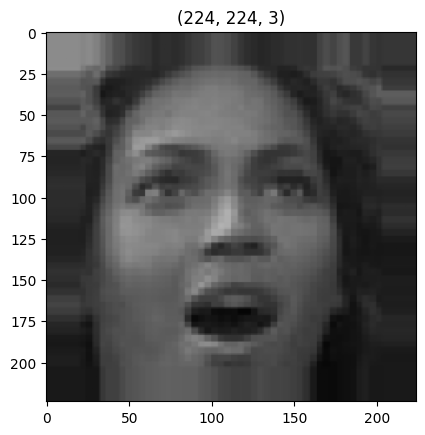

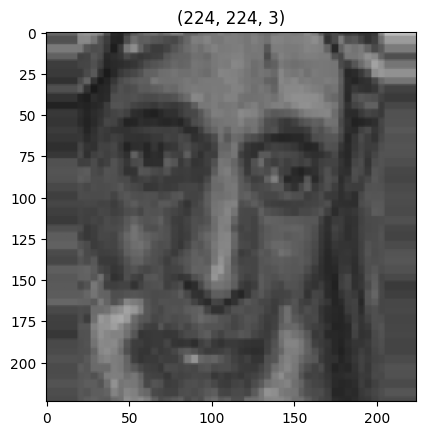

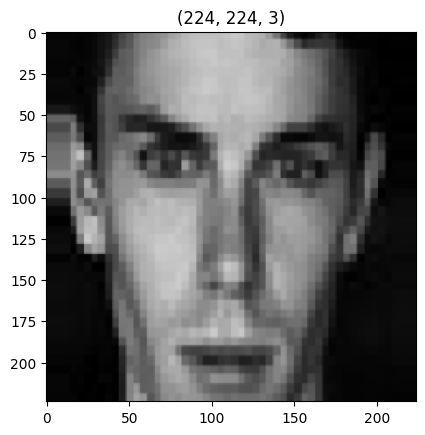

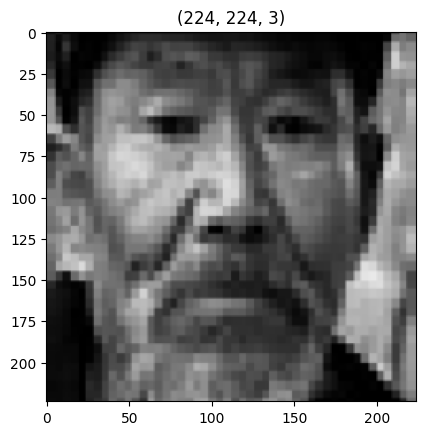

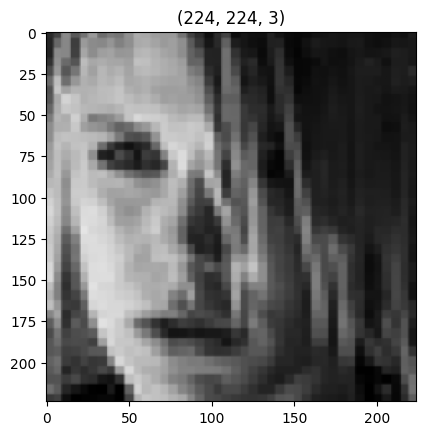

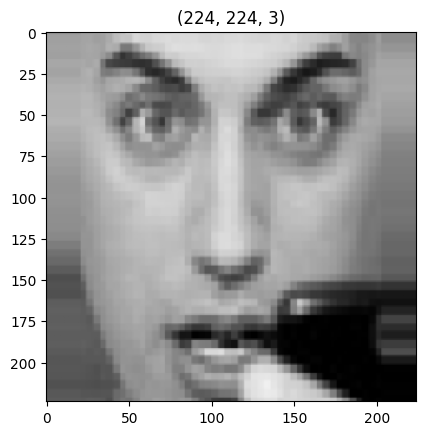

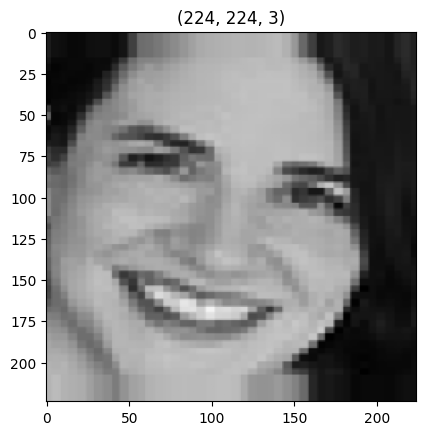

In [5]:

t_img , label = train_data.next()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)
''' plt.imshow(im)
    plt.title(im.shape)
    #plt.axis = False
    plt.axis("off")
    plt.show()
    
    count += 1
    if count == 10:
      break
    '''
    

#-----------------------------------------------------------------------------
# function call to plot the images 
t_img, label = train_data.next()
plotImages(t_img, label)


#**Using MobileNet for its pre-trained weights**


In [6]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )
#base_model = MobileNet( input_shape=(48,48,3), include_top= False )
for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)



# **Creating our model.**


In [7]:
model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

#**Training the model**

In [8]:
hist = model.fit(train_data, 
                           steps_per_epoch= 2, 
                           epochs= 5, 
                           validation_data= val_data, 
                           validation_steps= 15)

Epoch 1/5
2/2 [==============================] - 41s 27s/step - loss: 11.1128 - accuracy: 0.2188 - val_loss: 25.6156 - val_accuracy: 0.1688
Epoch 2/5
2/2 [==============================] - 22s 20s/step - loss: 25.8110 - accuracy: 0.1875 - val_loss: 12.4656 - val_accuracy: 0.1854
Epoch 3/5
2/2 [==============================] - 20s 19s/step - loss: 9.8416 - accuracy: 0.2500 - val_loss: 7.9497 - val_accuracy: 0.3021
Epoch 4/5
2/2 [==============================] - 30s 27s/step - loss: 9.6771 - accuracy: 0.1719 - val_loss: 9.2492 - val_accuracy: 0.2562
Epoch 5/5
2/2 [==============================] - 22s 19s/step - loss: 9.6532 - accuracy: 0.3125 - val_loss: 11.7121 - val_accuracy: 0.2875


#**Saving the built Model**

In [9]:
# Save the model in h5 format 
model.save('final_model.h5')

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#**Train accuracy v/s Testing accuracy**

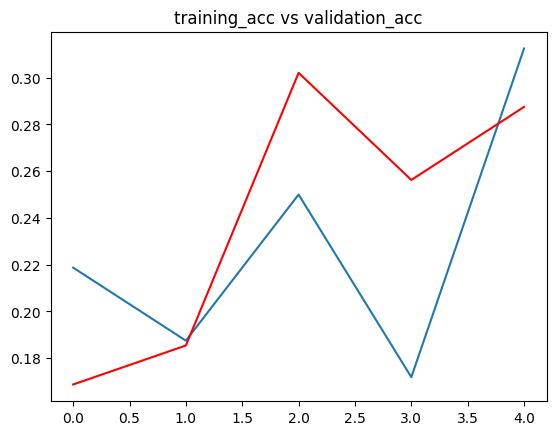

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'] , c = "red")
plt.title("training_acc vs validation_acc")
plt.show()

#**Training Loss v/s Testing Loss**

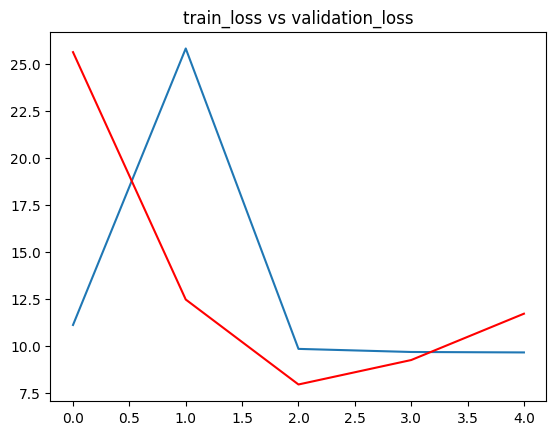

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] , c = "red")
plt.title("train_loss vs validation_loss")
plt.show()

# **Testing the model using images**

In [12]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 2s 2s/step
 the image is of happy


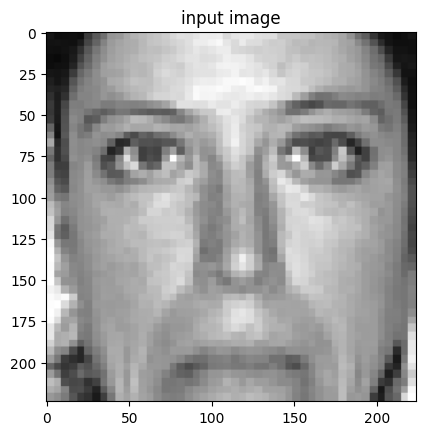

In [13]:
# path for the image to see if it predics correct class

path = "test\\disgust\\PrivateTest_11895083.jpg"
img = load_img(path, target_size=(224,224) )
#img = load_img(path, target_size=(48,48) )
i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()